# PISA 2012 DATA ANALYSIS
## by Steve Choi
---
## Table of Contents
- [Introduction](#intro)
- [Preliminary Wrangling](#wrangle)
 - [Cleaning Data](#cleaning)
 - [Preparing Data](#prep)
- [Univariate Exploration](#univariate)
 - [1. Distribution of Students by Items](#univariate)
 - [2. Distribution of Students by Number of Possessions](#Q2)
 - [3. Distribution of Students by Gender](#Q3)
- [Bivariate Exploration](#bivariate)
 - [4. Total Score vs Gender](#bivariate)
 - [5. Average Total Score vs Number of Possessions](#Q5)
 - [6. Average Performance vs Number of Possessions by Subject](#Q6)
- [Multivariate Exploration](#multivariate)
 - [7. Total Score vs Individual Items](#multivariate)
 - [8. Distribution of Students by Number of Possessions and Performance](#Q8)
 - [9. Student Performance by Number of Possessions and Gender](#Q9) 
- [Conclusion](#conclusion)
- [Reference](#ref) 

<a id='intro'></a>
## Introduction
#### What is PISA?
>The Programme for International Student Assessment (PISA) is a triennial international survey which aims to evaluate education systems worldwide by testing the skills and knowledge of 15-year-old students who are nearing the end of their compulsory education. PISA assesses how well they can apply what they learn in school to real-life situations. 
Over 90 countries have participated in the assessment so far which began in 2000. Every three years students are tested in the key subjects: reading, mathematics and science. In one assessment there is a focus on one of the subjects. For example in the year 2000, the focus was on reading which allowed us to get more in-depth information on the students' reading skills. In addition to the three core subjects, students are tested in an innnovative domain such as collaborative problem solving in 2015 and global competence in 2018. Some countries also choose to administer an assessment in financial literacy.

#### PISA 2012 Data
> PISA 2012 is the programme’s 5th survey. It assessed the competencies of 15-year-olds in reading, mathematics and science (with a focus on mathematics) in 65 countries and economies. In 44 of those countries and economies about 85 000 students also took part in an optional assessment of creative problem solving; and in 18 countries and economies, students were assessed in financial literacy. <br>
Around 510 000 students between the ages of 15 years 3 months and 16 years 2 months participated in PISA 2012 as a whole representing about 28 million 15-year-olds globally. 
The students took a paper-based test that lasted 2 hours. The tests were a mixture of open-ended and multiple-choice questions that were organised in groups based on a passage setting out a real-life situation. A total of about 390 minutes of test items were covered.  Students took different combinations of different tests. They and their school principals also answered questionnaires to provide information about the students' backgrounds, schools and learning experiences and about the broader school system and learning environment.


<a id='wrangle'></a>
## Preliminary Wrangling
---
> Since the original dataset consists of approximately 500,000 rows and 635 columns, first step is to take a closer look at each column variable and select appropriate columns regarding the questions I want to ask.<br>
In this project, I will be exploring relationships between students' performance and their possessions to ask questions such as:
- Distribution of students by items and total number of possessions
- Student performance vs item
- Student average performance vs total number of possessions

>After carefully examining the pisa2012 data dictionary, I can narrow my dataset down to 32 columns.<br>
This includes 14 possession-related items (excluding 3 country items for consistency), 15 performance ratings (math, reading, and science), and 3 extra columns (`country`, `OECD`, and `gender`) I might use as well. <br>
However, even after my extensive effort of reducing the dataset, I still have to load the data in chunks to avoid any memory shortage on my personal laptop.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

In [19]:
# read PISA data in chunks
lst = []

my_cols = [0, 1, 4, 12, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 501,\
           502, 503, 504, 505, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550]


for chunk in pd.read_csv('data/pisa2012.csv', encoding='ISO-8859-1', index_col=0,\
                         low_memory=False, usecols=my_cols, chunksize=50000):
    lst.append(chunk)
    
df = pd.concat(lst, axis=0)

# clearing memory occupied by lst
del lst

# check
df.head()

,CNT,OECD,ST04Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
1,Albania,Non-OECD,Female,Yes,No,Yes,No,No,No,No,...,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877
2,Albania,Non-OECD,Female,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116
3,Albania,Non-OECD,Female,Yes,Yes,Yes,Yes,No,Yes,Yes,...,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643
4,Albania,Non-OECD,Female,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573
5,Albania,Non-OECD,Female,Yes,Yes,No,Yes,Yes,Yes,Yes,...,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746


In [20]:
# check shape
df.shape

(485490, 32)

In [21]:
# checking columns
df.columns

Index(['CNT', 'OECD', 'ST04Q01', 'ST26Q01', 'ST26Q02', 'ST26Q03', 'ST26Q04',
       'ST26Q05', 'ST26Q06', 'ST26Q07', 'ST26Q08', 'ST26Q09', 'ST26Q10',
       'ST26Q11', 'ST26Q12', 'ST26Q13', 'ST26Q14', 'PV1MATH', 'PV2MATH',
       'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ',
       'PV4READ', 'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE',
       'PV5SCIE'],
      dtype='object')

<a id='cleaning'></a>
#### Cleaning Data
---
> Upon successful loading of the pisa2012 dataset, I can finally begin to explore it. <br>
But before making any analyses, I will need to rename my columns so that they are more descriptive. <br>
Then, I am going to finish the cleaning by removing any null and duplicate rows. 

In [22]:
# rename columns with more descriptive name
df.rename({    'CNT' : 'country', 
           'ST04Q01' : 'gender',
           'ST26Q01' : 'desk',
           'ST26Q02' : 'own_room',
           'ST26Q03' : 'study_place',
           'ST26Q04' : 'computer',
           'ST26Q05' : 'software',
           'ST26Q06' : 'internet',
           'ST26Q07' : 'literature',
           'ST26Q08' : 'poetry',
           'ST26Q09' : 'art',
           'ST26Q10' : 'textbooks',
           'ST26Q11' : 'technical_references',
           'ST26Q12' : 'dictionary',
           'ST26Q13' : 'dishwasher',
           'ST26Q14' : 'dvd'}, 
           axis='columns', inplace=True
          )

# check
df.head(3)

,country,OECD,gender,desk,own_room,study_place,computer,software,internet,literature,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
1,Albania,Non-OECD,Female,Yes,No,Yes,No,No,No,No,...,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877
2,Albania,Non-OECD,Female,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116
3,Albania,Non-OECD,Female,Yes,Yes,Yes,Yes,No,Yes,Yes,...,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643


In [23]:
# identify nulls
df.isnull().sum()

country                     0
OECD                        0
gender                      0
desk                    12411
own_room                15797
study_place             13470
computer                11613
software                22312
internet                12308
literature              19630
poetry                  18396
art                     18241
textbooks               14248
technical_references    21924
dictionary              11451
dishwasher              16375
dvd                     11414
PV1MATH                     0
PV2MATH                     0
PV3MATH                     0
PV4MATH                     0
PV5MATH                     0
PV1READ                     0
PV2READ                     0
PV3READ                     0
PV4READ                     0
PV5READ                     0
PV1SCIE                     0
PV2SCIE                     0
PV3SCIE                     0
PV4SCIE                     0
PV5SCIE                     0
dtype: int64

In [24]:
# total number of rows with null values
df[df.isnull().any(axis=1)].shape[0]

43867

In [25]:
# drop nulls
df.dropna(inplace=True)

# check shape
df.shape

(441623, 32)

In [26]:
# any duplicates?
df.duplicated().sum()

0

<a id='prep'></a>
#### Preparing Data
---
> Now, I need to reshape my dataset so that I can easily analyse it.
1. Replace all values in 14 item columns from `yes` and `no` to `True` and `False`. This will help me when performing arithmatic operations on them. <br>
2. Compute actual performance scores by taking mean of 5 sub-scores for each subject as well as their `total scores`.
3. Introduce a new column `possessions` which represents the total number of possessions of each student.
4. Save the master data

In [27]:
# Compute the mean plausible values on each subject per students and store them

# Math
df['math'] = np.mean(df.iloc[:,17:22], axis=1)

# Reading
df['reading'] = np.mean(df.iloc[:,22:27], axis=1)

# Science
df['science'] = np.mean(df.iloc[:,27:], axis=1)

# Check
df.head(3)

,country,OECD,gender,desk,own_room,study_place,computer,software,internet,literature,...,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,math,reading,science
1,Albania,Non-OECD,Female,Yes,No,Yes,No,No,No,No,...,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,366.18634,261.01424,355.252569
2,Albania,Non-OECD,Female,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,470.56396,384.68832,463.695911
3,Albania,Non-OECD,Female,Yes,Yes,Yes,Yes,No,Yes,Yes,...,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,505.53824,405.18154,477.681011


In [28]:
# drop unnecessary Plausible Value columns
df.drop(columns=df.columns[17:32], inplace=True)

# check
df.head(3)

,country,OECD,gender,desk,own_room,study_place,computer,software,internet,literature,poetry,art,textbooks,technical_references,dictionary,dishwasher,dvd,math,reading,science
1,Albania,Non-OECD,Female,Yes,No,Yes,No,No,No,No,Yes,No,Yes,No,Yes,No,Yes,366.18634,261.01424,355.252569
2,Albania,Non-OECD,Female,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,470.56396,384.68832,463.695911
3,Albania,Non-OECD,Female,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,505.53824,405.18154,477.681011


In [29]:
# Replace values in Possession-related columns with True for 'Yes' and False for 'No'
df.iloc[:,3:17] = df.iloc[:,3:17].replace({'No': False, 'Yes':True})

# check
df.head(3)

,country,OECD,gender,desk,own_room,study_place,computer,software,internet,literature,poetry,art,textbooks,technical_references,dictionary,dishwasher,dvd,math,reading,science
1,Albania,Non-OECD,Female,True,False,True,False,False,False,False,True,False,True,False,True,False,True,366.18634,261.01424,355.252569
2,Albania,Non-OECD,Female,True,True,True,True,True,True,True,True,True,True,True,True,True,True,470.56396,384.68832,463.695911
3,Albania,Non-OECD,Female,True,True,True,True,False,True,True,True,True,True,False,True,False,True,505.53824,405.18154,477.681011


In [33]:
# Create 'Possession' column which represents the number of a student possesses out of 7 items
df['total_score'] = df.iloc[:,17:21].sum(axis=1)

# check
df.head()

,country,OECD,gender,desk,own_room,study_place,computer,software,internet,literature,...,art,textbooks,technical_references,dictionary,dishwasher,dvd,math,reading,science,total_score
1,Albania,Non-OECD,Female,True,False,True,False,False,False,False,...,False,True,False,True,False,True,366.18634,261.01424,355.252569,982.453149
2,Albania,Non-OECD,Female,True,True,True,True,True,True,True,...,True,True,True,True,True,True,470.56396,384.68832,463.695911,1318.948191
3,Albania,Non-OECD,Female,True,True,True,True,False,True,True,...,True,True,False,True,False,True,505.53824,405.18154,477.681011,1388.400791
4,Albania,Non-OECD,Female,True,True,True,True,True,True,True,...,True,True,False,True,True,False,449.45476,477.46376,456.682931,1383.601451
5,Albania,Non-OECD,Female,True,True,False,True,True,True,True,...,True,True,False,True,True,True,385.50398,256.01010,353.900426,995.414506


In [34]:
# Create 'Possession' column which represents the number of a student possesses out of 7 items
df['possessions'] = df.iloc[:,3:17].sum(axis=1)

# check
df.head()

,country,OECD,gender,desk,own_room,study_place,computer,software,internet,literature,...,textbooks,technical_references,dictionary,dishwasher,dvd,math,reading,science,total_score,possessions
1,Albania,Non-OECD,Female,True,False,True,False,False,False,False,...,True,False,True,False,True,366.18634,261.01424,355.252569,982.453149,6
2,Albania,Non-OECD,Female,True,True,True,True,True,True,True,...,True,True,True,True,True,470.56396,384.68832,463.695911,1318.948191,14
3,Albania,Non-OECD,Female,True,True,True,True,False,True,True,...,True,False,True,False,True,505.53824,405.18154,477.681011,1388.400791,11
4,Albania,Non-OECD,Female,True,True,True,True,True,True,True,...,True,False,True,True,False,449.45476,477.46376,456.682931,1383.601451,12
5,Albania,Non-OECD,Female,True,True,False,True,True,True,True,...,True,False,True,True,True,385.50398,256.01010,353.900426,995.414506,12


In [35]:
# save master data
df.to_csv('data\pisa2012_clean.csv', index=False)

<a id='univariate'></a>
## Univariate Exploration
---
> In this section, I will start analyzing the data by investigating single variables. 
### 1. Distribution of Students by Items
> To begin with, I want to see how many students possess each item and rank them in order. Note that, students can have multiple items simultaneously. <br>
**Horizontal bar chart is used over vertical bar chart due to lengthy categorical variable names.**

In [2]:
# load clean data and check first five rows
df = pd.read_csv('data\pisa2012_clean.csv')
df.head()

,country,OECD,gender,desk,own_room,study_place,computer,software,internet,literature,...,textbooks,technical_references,dictionary,dishwasher,dvd,math,reading,science,total_score,possessions
0,Albania,Non-OECD,Female,True,False,True,False,False,False,False,...,True,False,True,False,True,366.18634,261.01424,355.252569,982.453149,6
1,Albania,Non-OECD,Female,True,True,True,True,True,True,True,...,True,True,True,True,True,470.56396,384.68832,463.695911,1318.948191,14
2,Albania,Non-OECD,Female,True,True,True,True,False,True,True,...,True,False,True,False,True,505.53824,405.18154,477.681011,1388.400791,11
3,Albania,Non-OECD,Female,True,True,True,True,True,True,True,...,True,False,True,True,False,449.45476,477.46376,456.682931,1383.601451,12
4,Albania,Non-OECD,Female,True,True,False,True,True,True,True,...,True,False,True,True,True,385.50398,256.01010,353.900426,995.414506,12


In [3]:
# Number of students per each item
no_student = []

for i in range(3,17):
    no_student.append(round(df.iloc[:,i].sum()))

# create dataframe for first visualization
df_q1 = pd.DataFrame()
df_q1['Possessions'] = list(map(lambda x:x.replace('_', ' ').title(),df.columns[3:17]))
df_q1['num_student'] = no_student

df_q1.sort_values(by=['num_student'], ascending=False, inplace=True)
df_q1

,Possessions,num_student
11,Dictionary,418353
13,Dvd,402036
0,Desk,390576
3,Computer,382528
2,Study Place,381441
5,Internet,374587
9,Textbooks,364121
1,Own Room,348297
8,Art,252956
12,Dishwasher,251830


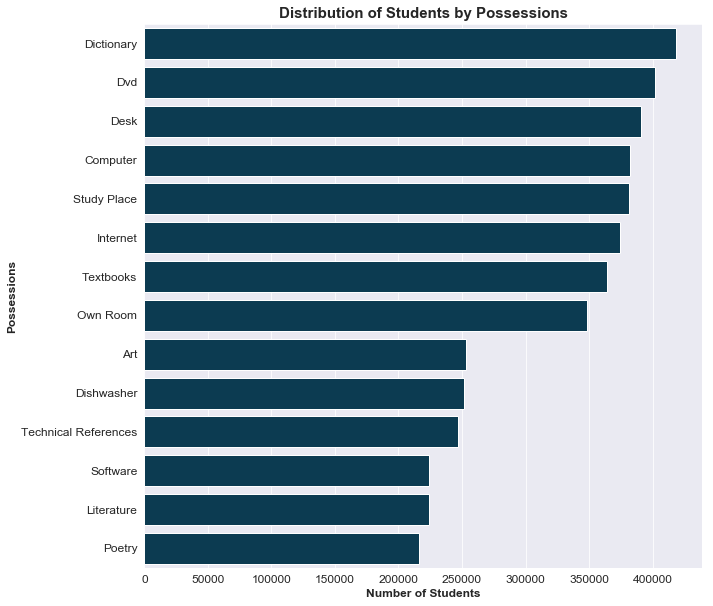

In [4]:
# define figure size
plt.figure(figsize=(10, 10))

# bar chart using seaborn/ applying palette to distinguish high to low profits
sns.barplot(data=df_q1, x='num_student', y='Possessions', color='#003f5c')


# write a function to set title, label, and ticks for the plot
def fig_labels(title, xlabel, ylabel, xtick_loc=None, xtick_lab=None, ytick_loc=None, ytick_lab=None):
    plt.title(title, fontweight='semibold', fontsize=15)
    plt.xlabel(xlabel, fontweight='semibold', fontsize=12)
    plt.ylabel(ylabel, fontweight='semibold', fontsize=12)
    plt.xticks(xtick_loc, xtick_lab, fontsize=12)
    plt.yticks(ytick_loc, ytick_lab, fontsize=12)
    return

fig_labels('Distribution of Students by Possessions', 'Number of Students', 'Possessions');

> - Top 3 items are `Dictionary`, `DVD`, and `Desk` while bottom 3 items are `Software`, `Literature`, and `Poetry`.
- Number of students who own `Dictionary` are approximately twice as high as that of `Poetry`.
- There is a noticeable jump in the number of students between `Own room` (8th in rank) and `Art` (9th in rank). 



<a id='Q2'></a>
### 2. Distribution of Students by Number of Possessions
> Now, let's take a look at how students are distributed depending on their total number of possessions.

In [5]:
# count number of students by total number of possessions
df['possessions'].value_counts()

11    65497
12    63513
10    59770
13    51721
9     48891
14    41512
8     37026
7     26384
6     18265
5     12290
4      8017
3      4633
2      2483
1      1037
0       584
Name: possessions, dtype: int64

In [6]:
# summary statistic
df['possessions'].describe()

count    441623.000000
mean         10.139393
std           2.730068
min           0.000000
25%           8.000000
50%          11.000000
75%          12.000000
max          14.000000
Name: possessions, dtype: float64

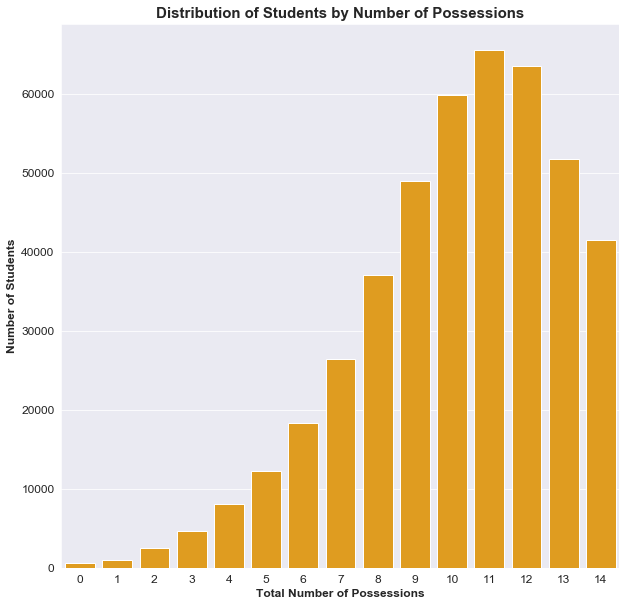

In [7]:
# define figure size,
plt.figure(figsize=(10, 10))

# use countplot
sns.countplot(data=df, x='possessions', color='#ffa600')

# set title, label, and ticks for the plot 
fig_labels('Distribution of Students by Number of Possessions', 'Total Number of Possessions', 'Number of Students');

> - Student distribution by total number of possessions tends to be left-skewed.
- Highest frequency, or mode, is students with total 11 possessions. 
- First quartile is at 8 which means 75% of students have at least 8 items in possession.

<a id='Q3'></a>
### 3. Distribution of Students by Gender
> Lastly, let's take a look at the proportion of students by their gender.

In [8]:
# count students for each gender
sorted_counts = df['gender'].value_counts()
sorted_counts

Female    223014
Male      218609
Name: gender, dtype: int64

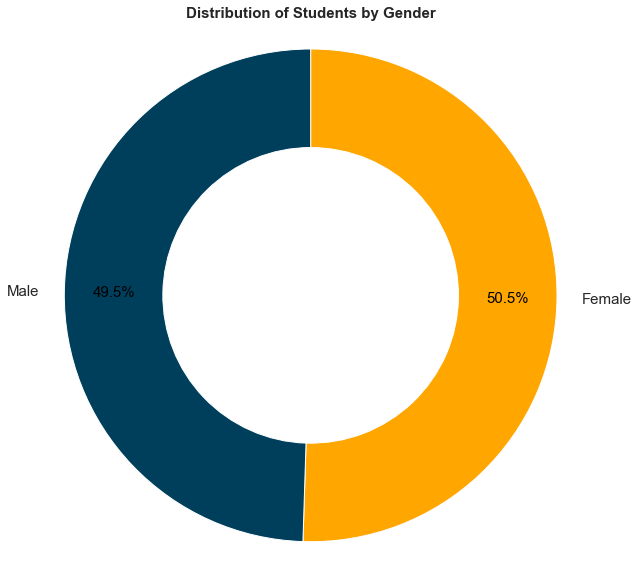

In [9]:
# define figure size,
plt.figure(figsize=(10, 10))

# use pie plot
patches, texts, autotexts  = plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.1f%%',
                                     pctdistance=0.8, counterclock = False, wedgeprops = {'width' : 0.4}, colors=['#ffa600', '#003f5c']);
plt.axis('square')

# set title, label, and ticks for the plot 
fig_labels('Distribution of Students by Gender', '', '');

# set label fontsize and color using for-loop
for i in range(len(texts)):
    texts[i].set_fontsize(15)
    autotexts[i].set_fontsize(15)
    autotexts[i].set_color('Black');

> - We have slightly less males (49.5%) compared to female students (50.5%). 

<a id='bivariate'></a>
## Bivariate Exploration
---
> In this section, I will start analyzing the data by investigating two variables at a time.

<a id='Q4'></a>
### 4. Total Score vs Gender
> How do female and male student perform differently in terms of total score ?

In [11]:
# summary statistic for female students
df[df['gender'] == 'Female']['total_score'].describe()

count    223014.000000
mean       1444.739421
std         270.778032
min         286.714303
25%        1250.880956
50%        1442.685653
75%        1637.137676
max        2487.885257
Name: total_score, dtype: float64

In [12]:
# summary statistic for male students
df[df['gender'] == 'Male']['total_score'].describe()

count    218609.000000
mean       1419.661918
std         292.808565
min         229.808249
25%        1208.111900
50%        1417.309223
75%        1631.340940
max        2480.120500
Name: total_score, dtype: float64

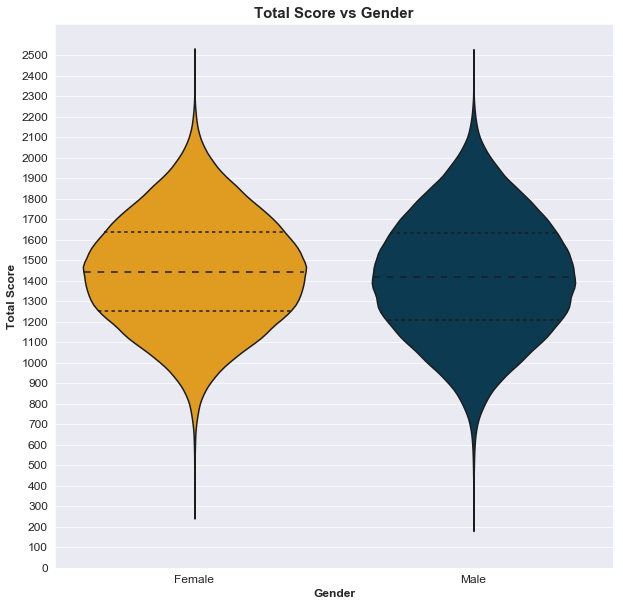

In [33]:
# define figure size
plt.figure(figsize=(10, 10))

# use violin plot
sns.violinplot(data = df, x="gender", y="total_score", palette=['#ffa600', '#003f5c'], inner="quartile")

# set title, label, and ticks for the plot 
plt.yticks(np.arange(0, 2600, 100), fontsize=12)

fig_labels('Total Score vs Gender', 'Gender', 'Total Score');

> - Female plot is wider than male plot indicating there are more data points for female group.
- For both gender group, total score ranges from 200 to 2500.
- In general, female students turns out to perform better than male student by ~25 points in total score.

<a id='Q5'></a>
### 5. Average Total Score vs Number of Possessions
> Does the number of possessions affect students' performance ? <br>
Let's find it out!

In [35]:
# calculate average of total score by grouping by the number of possessions
df_mean_tot = df.groupby(['possessions']).mean().iloc[:,-1:]
df_mean_tot

,total_score
possessions,
0,1076.420029
1,1113.511679
2,1155.283747
3,1183.207358
4,1201.781899
5,1231.683081
6,1257.289222
7,1294.362519
8,1336.807165


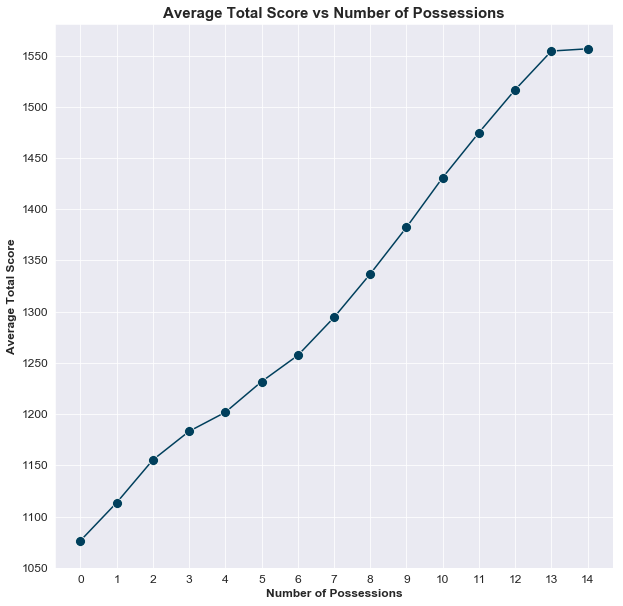

In [36]:
# line plot (averaged total score)
plt.figure(figsize=(10, 10))

sns.lineplot(x=df_mean_tot.index, y='total_score', marker='o', markersize=10, data=df_mean_tot, color='#003f5c')

# set title, label, and ticks for the plot 
plt.xticks(np.arange(15), fontsize=12)
plt.yticks(np.arange(1050, 1600, 50), fontsize=12)

fig_labels('Average Total Score vs Number of Possessions', 'Number of Possessions', 'Average Total Score')

> - There is a positive relationship between total score and the number of possessions.
- The slope tends to be steady except between 13 and 14 possessions (still positive!)

<a id='Q6'></a>
### 6. Average Score vs Number of Possessions by Subject
> Now, I want to dig more into the previous plot by plotting the relationship for each subject.

In [39]:
# average performance by number of possessions
df_mean_subj = df.groupby(['possessions']).mean().iloc[:,-4:-1]
df_mean_subj

,math,reading,science
possessions,,,
0,365.133557,347.974993,363.311479
1,369.063358,369.868847,374.579473
2,381.772947,385.920900,387.589900
3,389.694482,397.334201,396.178675
4,396.444581,402.692047,402.645270
5,406.281526,412.716781,412.684773
6,415.058193,420.850462,421.380566
7,428.332938,432.033178,433.996403
8,443.061946,445.664119,448.081099


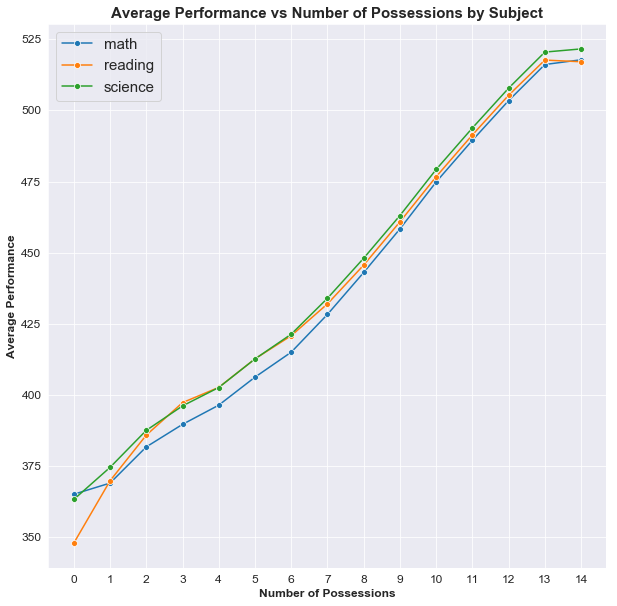

In [44]:
# line plot (averaged data)
plt.figure(figsize=(10, 10))

[sns.lineplot(x=df_mean_subj.index, y=df_mean_subj.iloc[:,i], marker='o', label=df_mean_subj.columns[i], data=df_mean_subj) for i in range(3)]

# set title, label, and ticks for the plot 
plt.xticks(np.arange(15), fontsize=12)

fig_labels('Average Performance vs Number of Possessions by Subject', 'Number of Possessions', 'Average Performance')

# set legend
plt.legend(loc='upper left', fontsize=15);

> - In general, there is a positive relationship between Average Performance and the number of possessions.
- Average Performance for reading decreases between number of possessions of 13 and 14.

<a id='multivariate'></a>
## Multivariate Exploration

<a id='Q7'></a>
### 7. Total Score vs Individual Items
> Previously, we saw that having more possession resulted in acquiring higher score in the test. <br>
Here, I want to see how the possession of an individual item affects the score as well. 

In [54]:
# average score differences depending on the possession of the item
items = df.columns[3:17]
for i in items:
    print(i+': ', df[df[i] == True]['total_score'].mean() - df[df[i] == False]['total_score'].mean())

desk:  194.71489292689375
own_room:  92.03695873655147
study_place:  132.36200520304806
computer:  241.42371677629853
software:  83.28387923862147
internet:  247.42626529614427
literature:  134.22915485030808
poetry:  63.8893615648517
art:  105.82379857625347
textbooks:  119.90079790006098
technical_references:  117.97091653028974
dictionary:  198.59114129981117
dishwasher:  76.38077155905694
dvd:  105.80877887079623


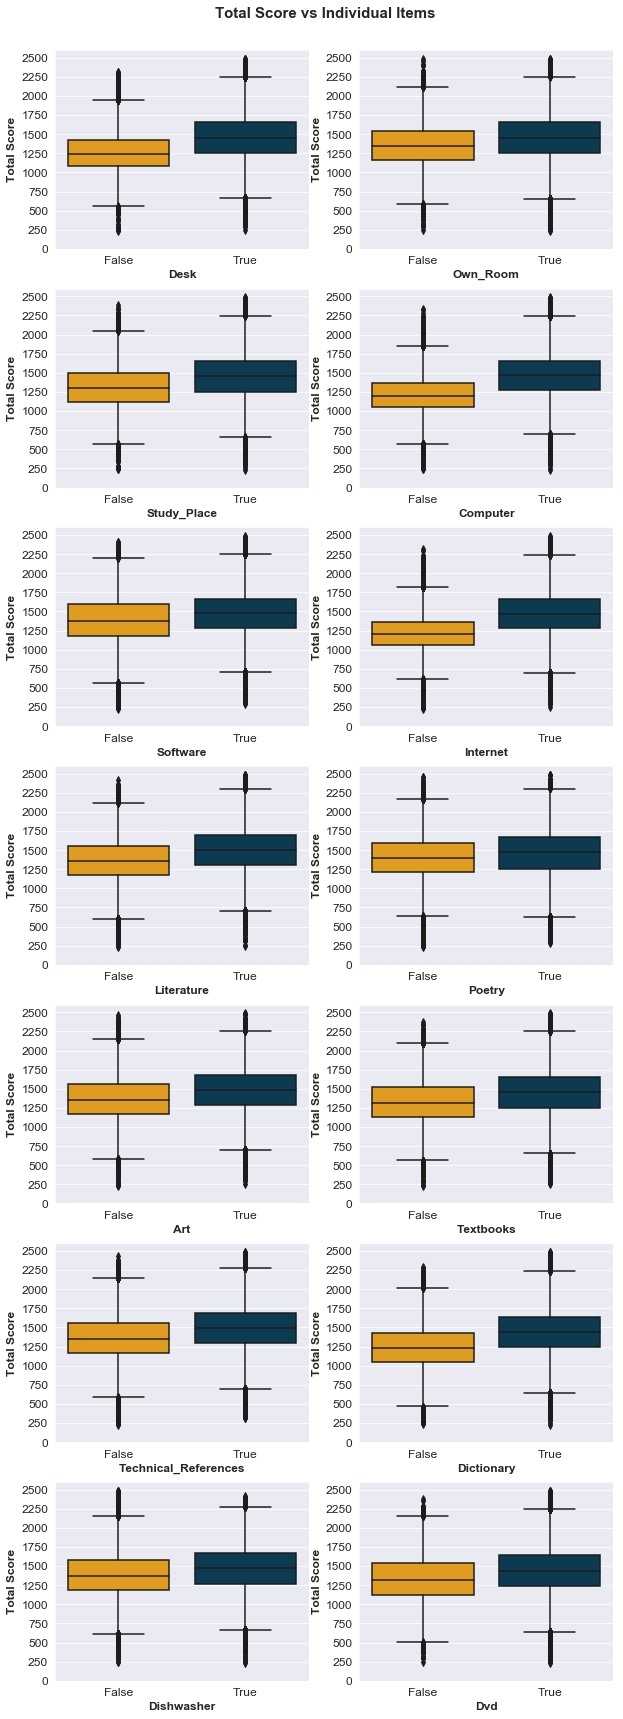

In [37]:
# define figure size, subtitle
plt.figure(figsize=(10, 30))
plt.suptitle("Total Score vs Individual Items", fontsize=15, fontweight='semibold', x=0.5, y=0.90)

for i in range(14):    
    plt.subplot(7, 2, i+1)
    sns.boxplot(data=df, x=df.columns[i+3], y='total_score', palette=['#ffa600', '#003f5c'])

    # set title, label, and ticks for the plot 
    plt.yticks(np.arange(0, 2600, 250), fontsize=12)

    fig_labels('', df.columns[i+3].title(), 'Total Score')

> - Every single item results in boosting the total score when possessed.
- `Internet` and `Computer` are two most effective items for performance (+250 score).
- `Poetry` and `Dishwasher` are two least effective items for performance (+70 score).

<a id='Q8'></a>
### 8. Distribution of Students by Number of Possessions and Performance
> 

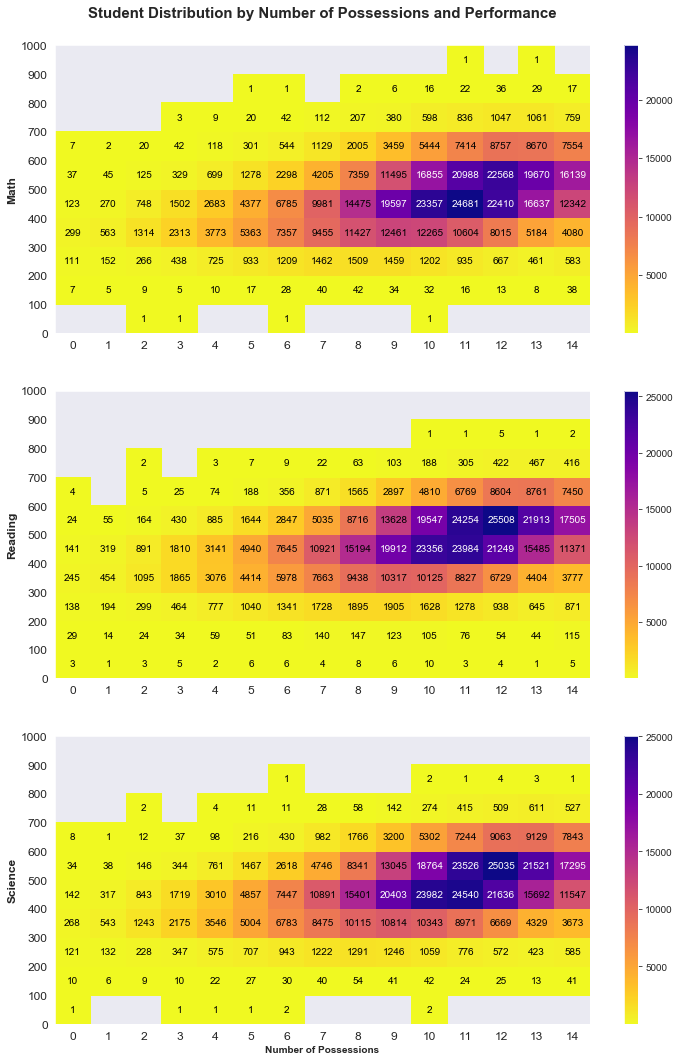

In [20]:
# define figure size & subtitle
fig = plt.figure(figsize=(12, 18))
plt.suptitle("Student Distribution by Number of Possessions and Performance", fontsize=15, fontweight='semibold',x=0.435, y=0.91)

# plot 2d histogram
for idx in range(3):
    plt.subplot(3, 1, idx+1)

    bins_x = np.arange(0, 16, 1)
    bins_y = np.arange(0, 1100, 100)
    h2d = plt.hist2d(data = df, x = 'possessions', y = df.columns[idx+17],
               bins = [bins_x, bins_y], cmap = 'plasma_r', cmin = 0.5)

    counts = h2d[0]

    for i in range(counts.shape[0]):
        for j in range(counts.shape[1]):
            c = counts[i,j]
            if c >= 16000: # increase visibility on darkest cells
                plt.text(bins_x[i]+0.5, bins_y[j]+50, int(c),
                         ha = 'center', va = 'center', color = 'white')
            elif c > 0:
                plt.text(bins_x[i]+0.5, bins_y[j]+50, int(c),
                         ha = 'center', va = 'center', color = 'black')
    
    plt.ylabel(df.columns[idx+17].title(), fontweight='semibold', fontsize=12)
    plt.xticks(np.arange(0.5, 15.5), np.arange(15), fontsize=12)
    plt.yticks(np.arange(0, 1100, 100), fontsize=12)
    plt.colorbar()

# add xlabel on the last plot
plt.xlabel('Number of Possessions', fontweight='semibold');

> - For all 3 subjects, majority of students are positioned between score of 400 to 600 while having 10 to 12 possessions.
- There are 2 students who scored over 900 in mathematics.
- There are more students who scored less than 100 in reading when compared to math and science.
- As discovered earlier, number of possessions have positive impact on student performances.

<a id='Q9'></a>
### 9. Student Performance by Number of Possessions and Gender
> Finally, I would like to see how student performance varies by number of possessions and by the gender as well.

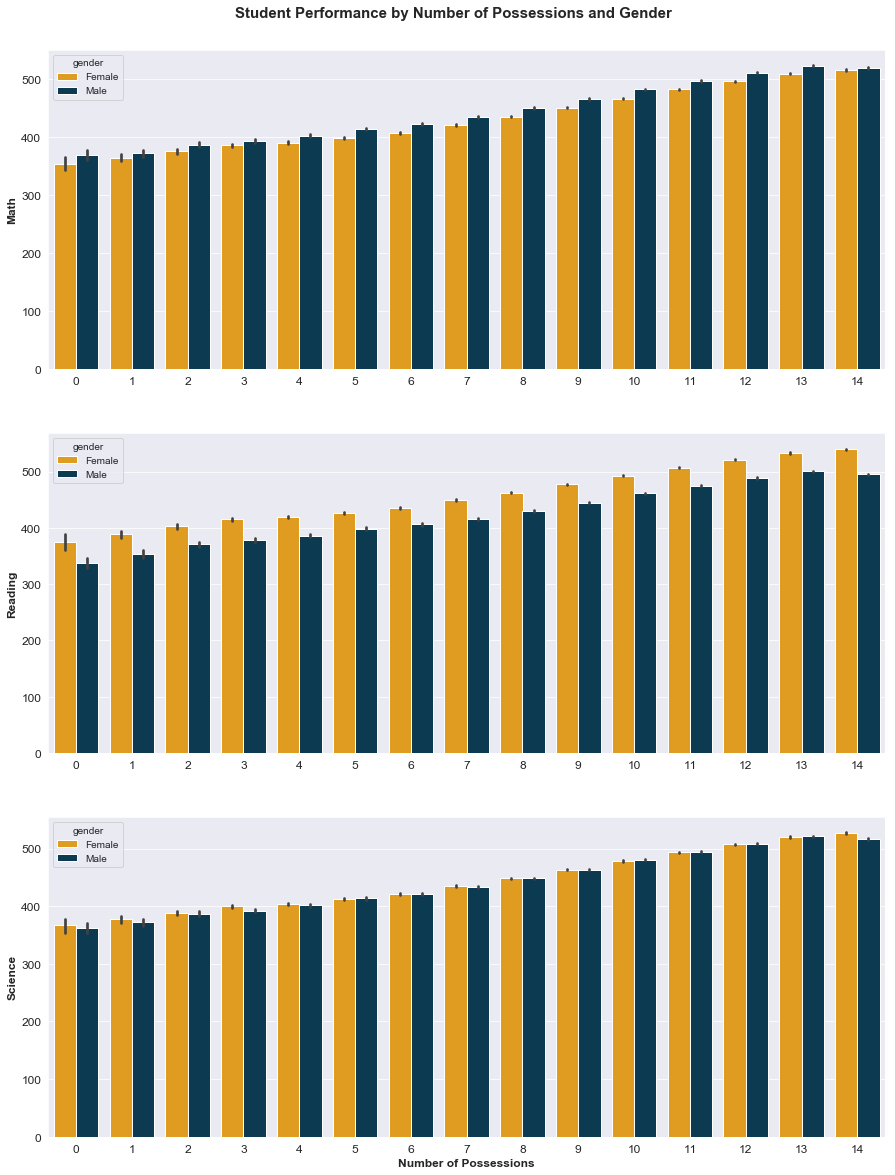

In [61]:
plt.figure(figsize=(15, 20))
plt.suptitle("Student Performance by Number of Possessions and Gender", fontsize=15, fontweight='semibold',x=0.5, y=0.91)

for i in range(3):
    plt.subplot(3, 1, i+1)
    sns.barplot(data = df, x='possessions', y=df.columns[i+17], hue='gender', palette=['#ffa600', '#003f5c'])
    
    plt.xlabel(None)
    plt.ylabel(df.columns[i+17].title(), fontweight='semibold', fontsize=12)
    plt.xticks(np.arange(15), fontsize=12)
    plt.yticks(fontsize=12)


# add xlabel on the last plot
plt.xlabel('Number of Possessions', fontsize=12, fontweight='semibold');

> - Male students performs better in mathematics.
- Female students outperforms male students in reading.
- There is no significant differences in science performance between male and female students.

<a id='conclusion'></a>
## Conclusion

> We have explored pisa2012 dataset and observed some interesting findings and relationships between student performance and variables such as gender, individual possessions, and total number of possessions.<br><br>
***To summarize our conclusion:***<br>
- `Dictionary`, `DVD`, and `Desk` are three most popular items possessed by students.
- `Internet` and `Dictionary` had the most impact while `Poetry` and `Dishwasher` had the least impact on student performance.
- 75% of students owns more than 8 items or more.
- There is a positive correlation between student performance and the number of possessions.
- Female students outperformed male student in reading while male student performed slightly better in mathematics in general.

> 

<a id='ref'></a>
## Reference

>1. PISA Contest: http://mi2.mini.pw.edu.pl:8080/SmarterPoland/PISAcontest/
2. PISA Survey Design: http://www.oecd.org/pisa/data/pisa2012technicalreport.htm
3. PISA Data and Codebooks: http://www.oecd.org/pisa/data/pisa2012database-downloadabledata.htm
4. seaborn Data Visualization: https://seaborn.pydata.org/